In [251]:
#Saya importkan semua yang dibutuhkan dalam program ini
import json, requests
import tweepy
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tweepy import OAuthHandler
import re, string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as SF
import nltk

In [252]:
#Saya masuk ke Twitter melalui file Json dengan nama 'token' yang sebelumnya sudah saya buatkan
with open("token.json") as f:
  tokens = json.load(f)

In [253]:
#saya inputkan dari token Json tersebut
with open("token.json") as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['acces_token']
acces_token_secrett = tokens['acces_token_secret']

tokens.keys()


dict_keys(['bearer_token', 'api_key', 'api_key_secret', 'acces_token', 'acces_token_secret'])

In [254]:
#buat variabel authentikasi dan api
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token,acces_token_secrett)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [255]:
#mencari topik perbincangan dengan tema 'Mahasiswa'
posts = api.user_timeline(screen_name="Mahasiswa", count = 200, lang ="en", tweet_mode="extended")

In [256]:
#saya menggunakan dataframe agar lebih terlihat jelas
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [257]:
#saya cleaning dari text atau tanda yang tidak dibutuhkan
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) # Menghapus @mentions
    text = re.sub('#', '', text) # Menghapus '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Menghapus RT
    text = re.sub('https?:\/\/\S+', '', text) # Menghapus hyperlink
    return text

In [258]:
#intruksi dari perintah sebelumnya
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [259]:
#memanggil
df.head(10)

,Tweets
0,Selamat Ujian Nasional calon Mahasiswa Hebat. ...
1,Selamat sore
2,"Yok "": ayokk, salam kenal”"
3,Gunung nya sih kagak. Yg dibawah gunung kali y...
4,eta salaman dulu sini
5,Suatu saat pengalaman lah yg mebedakan kalian ...
6,"Ciyan "": tolak valentine karena belom move on ..."
7,"Banjir min banjir "": Kamu orang apa ces cesan ..."
8,Gw g setuju klo syaratny keterangan tdk mampu ...
9,Hidup cuma sekali. Cari lah kebahagiaan yg jug...


In [260]:
#memanggil dengan bentuk yang lain
print("Berikut ini adalah 10 twit terakhir dari akun @Mahasiswa:\n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Berikut ini adalah 10 twit terakhir dari akun @Mahasiswa:

1) Selamat Ujian Nasional calon Mahasiswa Hebat. Semoga berjalan lancar dan hasil memuaskan. :)

2) Selamat sore

3) Yok "@SagalaLC: @Mahasiswa ayokk, salam kenal”

4) Gunung nya sih kagak. Yg dibawah gunung kali yak "@mahasiswajatim: Apane seng banjir? Hayo? RT @Mahasiswa: Banjir min banjir "@mahasiswajati

5) @SagalaLC eta salaman dulu sini

6) Suatu saat pengalaman lah yg mebedakan kalian mahasiswa dengan orang biasa. :) #mahasiswaITUsimpel

7) Ciyan "@yeahmahasiswa: tolak valentine karena belom move on #klasik”

8) Banjir min banjir "@mahasiswajatim: Kamu orang apa ces cesan sih? Di colokin sana sini kok oke oke aja loh”

9) Gw g setuju klo syaratny keterangan tdk mampu "@BeasiswaIndo: #SurveiBeasiswa: menurut km. sudah adilkah sistem #beasiswa dikampusmu? ~0213”

10) Hidup cuma sekali. Cari lah kebahagiaan yg juga membahagiakan orang lain ( emak babe sodara sahabat Semuanya deh. ).



In [261]:
#Memanggil data Mahasiswa dari situs berita
page = requests.get('https://edukasi.kompas.com/read/2022/03/30/151059571/kisah-tiga-siswa-penghafal-alquran-raih-beasiswa-umrah-dari-sekolah')
soup = BeautifulSoup(page.text, 'html.parser')

In [262]:
#saya pastikan panggilan tersebut sukses
if page.status_code==200:
  print('sukses')

sukses


In [263]:
#intruksi 'p' menandakan isi dari berita tersebut
articles = soup.find_all('p')
for p in articles:
    print(p.text)

Kisah Tiga Siswa Penghafal Alquran Raih Beasiswa Umrah dari Sekolah

KOMPAS.com - Sudah empat tahun, Sekolah Menengah Atas Negeri (SMAN) 2 Lembang konsisten menyelenggarakan program Beasiswa Umrah untuk para siswanya yang telah lulus Munaqosah Tahfidz Alquran.
Tahun 2022 ini, tiga siswa penghafal Alquran yakni Siti Apriliani kelas XI IPS 5, Dina Susilawati (XI IPS 1), dan Nazwa Manfalutfi A. (XI MIPA 2) terpilih melaksanakan ibadah umrah. Termasuk satu staf tata usaha, Kusnadi Hidayat.
Dilansir dari laman Disdik Jabar, mereka berangkat ke Tanah Suci pada 14 Mei 2022 bersama dua angkatan (6 siswa 2 guru/tenaga kependidikan) penerima beasiswa tahfiz sebelumnya yang tertunda karena Covid-19.
Baca juga: Mahasiswa Butuh Biaya Kuliah dan Hidup? Daftar Beasiswa Pertamina 2022
Kepala SMAN 2 Lembang, Lina menjelaskan bahwa program tersebut menegaskan salah satu visi SMAN 2 Lembang, yaitu "Membentuk Insan Akademis yang Religius, Unggul, Kompetitif, dan Berwawasan Lingkungan".
"Sudah empat tahun 

In [264]:
#menyimpan data ke csv
df.to_csv("berita_mahasiswa.csv")

In [265]:
#saya tampilkan untuk memastikan sudah tersipan atau belum
df = pd.read_csv('berita_mahasiswa.csv')
df

,Unnamed: 0,Tweets
0,0,Selamat Ujian Nasional calon Mahasiswa Hebat. ...
1,1,Selamat sore
2,2,"Yok "": ayokk, salam kenal”"
3,3,Gunung nya sih kagak. Yg dibawah gunung kali y...
4,4,eta salaman dulu sini
...,...,...
193,193,Gw udah mulai naruh barang dikosan nih... siap...
194,194,Hallo apakabar buku dan binder . . . Ada yg su...
195,195,Good morning.
196,196,Masuk hari ke 2 .... di 2014 nih...


In [266]:
# membersihkan data dengan fungsi case folding dan fungsi filter stopword
def case_folding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",data).split())
    data = re.sub(r"\d+", "", data)
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    return data

In [267]:
def stopword_cleaner(data):
    sw_indonesia = stopwords.words("indonesian")
    data  = [word for word in data if word not in sw_indonesia]
    data = ' '.join(data)
    return data

In [268]:
#Merapkan dengan memanfaatkan metode iloc
#MAAF STUCK, MASIH ERROR
#for index in range (len(df["Tweets"])):
 # df["Tweets"].iloc[index] = case_folding(df["Tweets"].iloc[index])
 # df["Tweets"].iloc[index] = word_tokenize(df["Tweets"].iloc[index])
 # df["Tweets"].iloc[index] = stopword_cleaner(df["Tweets"].iloc[index])

In [269]:
#data_berita = [berita.split() for berita in df["Tweets"]]
#data_berita
#MASIH ERROR

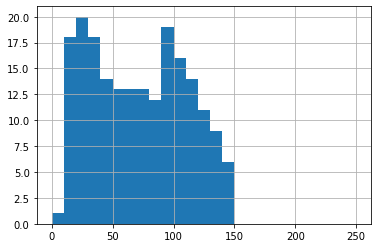

In [270]:
import matplotlib.pyplot as plt
#Distribusi Frekuensi Jumlah Karakter per Data
bin_range = np.arange(0, 260, 10)
df['Tweets'].str.len().hist(bins=bin_range)
plt.show()
 

In [271]:
#Distribusi Frekuensi Kata
#tokenization pada dataset
df['Tweets'] = df['Tweets'].apply(lambda x: word_tokenize(str(x)))

In [272]:
#masukkan pada semua token tersebut pada satu list yang sama
Tweet = [word for Tweets in df['Tweets'] for word in Tweets]
 

In [273]:
#Kita akan memanfaatkan library freqdist yang dimiliki oleh NLTK
from nltk.probability import FreqDist
fqdist = FreqDist(Tweet)

print(fqdist)

<FreqDist with 1195 samples and 2672 outcomes>


In [274]:
#Untuk mengetahui kata dan jumlah dari masing-masing kata kita bisa menggunakan.
most_common_word = fqdist.most_common(20)

print(most_common_word)

[('.', 156), ('...', 80), (':', 62), (',', 47), ('?', 45), ('”', 30), ('yang', 30), ('``', 25), ('lo', 25), ('–', 25), (')', 22), ('dengan', 20), ('dan', 19), ("''", 19), ('yg', 18), ('mahasiswa', 16), ('apa', 15), ('belajar', 15), ('akan', 15), ('ini', 14)]


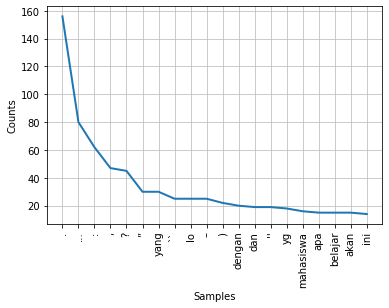

In [275]:
fqdist.plot(20,cumulative=False)

plt.show()

In [276]:
#Distribusi Ngram
#melakukan dengan module ngram pada NLTK
result = pd.Series(nltk.ngrams(Tweet, 2)).value_counts()[:20]

In [277]:
print (result)

(”, –)                     23
(..., .)                   18
(``, :)                    15
(., :)                      9
(:, D)                      8
(:, ))                      8
(!, !)                      8
(Good, morning)             6
(), .)                      6
(mahasiswa, .)              5
(semua, ?)                  5
(nih, ...)                  5
(kamu, tidak)               5
(., mahasiswaITUsimpel)     4
(., Dan)                    4
(apa, yang)                 4
(..., :)                    4
(ye, ...)                   4
(lo, semua)                 4
(., Selamat)                4
dtype: int64


Saya mengambil tema Mahasiswa karena saya sendiri adalah mahasiswa di semester awal dan ingin tau apa aja yang sedang viral di twitter pada kawan-kawan mahasiswa, ternyata banyak sekali opsi untuk memilih pendalam berita seperti contoh ada berita demo mahasiswa,Mahasiswa sedang UAS, dll tetapi saya mengambil tema Mahasiswa ke arah beasiswa penghafal alquran untuk menyemangati saya dan berjuang pada kawan-kawan mahasiswa penghafal alquran,